In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_data_v2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 4/X_data_before_MI_v2.csv')
y_v2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 4/y_target_v2.csv')

In [3]:
X_data_v2["diag_minus_onset"] = X_data_v2["diag_delta"]- X_data_v2["onset_delta"]

In [4]:
Gend = {"F":0, "M":1}
race = {"White":0, "Black":1, "Hispanic":2, "Unknown":3, "Other":4,"Asian":5}
hist = {"Yes":0, "No":1}
onsetsite = {"Other":0, "Bulbar":1, "Limb":2, "Limb and Bulbar":3}
treatmentgroup = {"Placebo":0, "Active":1}

In [5]:
X_data_v2 = X_data_v2.replace({'Gender':Gend})
X_data_v2 = X_data_v2.replace({'Race':race})
X_data_v2 = X_data_v2.replace({'family_ALS_hist':hist})
X_data_v2 = X_data_v2.replace({'onset_site':onsetsite})
X_data_v2 = X_data_v2.replace({'treatment_group':treatmentgroup})
X_data_v2

,Unnamed: 0,Unnamed: 0.1,SubjectID,Gender,Race,family_ALS_hist,if_use_Riluzole,treatment_group,onset_site,Age,diag_delta,onset_delta,alsfrs_total_slope,mean_alsfrs_total,min_alsfrs_total,max_alsfrs_total,mean_alsfrs_mouth,max_alsfrs_mouth,min_alsfrs_mouth,mean_alsfrs_hands,max_alsfrs_hands,min_alsfrs_hands,mean_alsfrs_leg,max_alsfrs_leg,min_alsfrs_leg,mean_alsfrs_trunk,max_alsfrs_trunk,min_alsfrs_trunk,mean_alsfrs_respiratory,max_alsfrs_respiratory,min_alsfrs_respiratory,alsfrs_mouth_slope,alsfrs_hands_slope,alsfrs_leg_slope,alsfrs_trunk_slope,alsfrs_respiratory_slope,fvc_slope,fvc_mean,fvc_min,fvc_max,...,resp_rate_slope,temp_slope,mean_weight,max_weight,min_weight,slope_weight,mean_BMI,mean_ALC,max_ALC,min_ALC,mean_AMC,max_AMC,min_AMC,mean_ANC,max_ANC,min_ANC,mean_CK,max_CK,min_CK,mean_Creatinine,max_Creatinine,min_Creatinine,mean_Total_Cholesterol,max_Total_Cholesterol,min_Total_Cholesterol,mean_Triglycerides,max_Triglycerides,min_Triglycerides,mean_Uric_Acid,max_Uric_Acid,min_Uric_Acid,ALC_slope,AMC_slope,ANC_slope,CK_slope,Creaetinine_slope,Total_Cholesterol_slope,Triglycerides_slope,Uric_Acid_slope,diag_minus_onset
0,0,0,348,0,0,0,0.0,0,0,52.0,-302.000000,-501.000000,-0.009689,30.250000,30.0,31.0,12.000000,12.0,12.0,5.500000,6.0,5.0,3.000000,3.0,3.0,5.750000,7.0,5.0,4.00,4.0,4.0,0.000000,0.016393,0.000000,-0.032787,0.000000,0.284522,86.424228,96.323526,80.35385,...,-0.065574,0.000000,120.033333,122.5,118.8,0.060656,0.004471,1.781389,1.893045,1.565840,0.385000,0.480000,0.280000,5.210000,6.160000,4.350000,199.750000,261.0,125.0,53.040000,53.040,53.04,4.971600,5.249600,4.861700,1.366100,1.63710,1.15160,295.913000,344.984000,267.660000,-0.003171,0.000889,-0.009667,1.200000,0.000000,-0.004310,0.005394,0.396533,199.000000
1,1,1,533,0,0,0,0.0,0,1,65.0,-44.000000,-1023.000000,0.002114,28.666667,27.0,30.0,4.333333,5.0,3.0,8.000000,8.0,8.0,6.000000,8.0,4.0,7.333333,8.0,7.0,3.00,3.0,3.0,-0.021978,0.000000,0.021978,-0.010989,0.000000,-0.583333,73.500000,70.000000,77.00000,...,0.000000,-0.003297,51.000000,52.0,50.5,-0.005495,0.003045,1.304147,1.470141,1.245963,0.457718,0.511753,0.425764,5.484587,4.991396,4.994487,149.000000,180.0,118.0,79.560000,79.560,79.56,6.018979,6.449237,5.846188,1.086069,1.04675,1.27705,318.701206,326.818620,310.598938,0.008373,0.004311,0.040468,0.681319,0.000000,0.002109,0.017275,-0.838279,979.000000
2,2,2,649,0,0,0,0.0,1,2,48.0,-305.367039,-395.010096,-0.000537,35.666667,35.0,36.0,8.666667,9.0,8.0,7.000000,8.0,6.0,8.000000,8.0,8.0,8.000000,8.0,8.0,4.00,4.0,4.0,0.016393,-0.016393,0.000000,0.000000,0.000000,-0.082707,94.000000,92.000000,97.00000,...,0.016393,0.113834,74.566667,75.6,73.7,0.011475,0.002990,2.020000,2.560000,1.520000,0.602500,0.880000,0.450000,6.357500,7.460000,5.000000,70.250000,84.0,59.0,50.830000,53.040,44.20,5.268975,5.559900,5.094420,1.935125,2.56510,1.53680,280.431155,358.579514,222.155953,-0.013333,-0.005513,-0.030897,0.320513,0.113333,0.003647,-0.012169,0.234609,89.643057
3,3,3,1064,0,0,0,0.0,0,1,66.0,-462.000000,-550.000000,-0.043752,32.000000,30.0,33.0,4.250000,5.0,3.0,8.000000,8.0,8.0,8.000000,8.0,8.0,8.000000,8.0,8.0,3.75,4.0,3.0,-0.028986,0.000000,0.000000,0.000000,-0.014493,-0.057374,92.885179,89.323154,93.28186,...,-0.057971,0.000000,80.700000,81.2,79.8,-0.020290,0.002810,1.749101,2.176370,1.447025,0.492000,0.780000,0.130000,4.466000,5.480000,3.930000,166.250000,194.0,135.0,70.720000,70.720,70.72,4.887540,5.146100,4.732400,1.919320,2.29190,1.61450,278.366400,297.400000,267.660000,-0.007562,-0.006957,0.018406,0.057971,0.000000,0.000374,0.001800,-0.258609,88.000000
4,4,4,1234,1,0,0,0.0,1,2,38.0,-190.115918,-449.933130,0.024394,21.250000,19.0,24.0,9.000000,10.0,8.0,1.000000,1.0,1.0,3.750000,4.0,3.0,3.500000,5.0,2.0,4.00,4.0,4.0,0.000000,0.000000,-0.014286,0.014286,0.000000,0.009325,71.000000,60.000000,85.00000,...,0.057143,0.048566,95.050000,96.0,94.5,0.021429,0.003086,1.762500,2.000000,1.560000,0.592500,0.630000,0.550000,6.682500,7.110000,6.230000,244.250000,353.0,198.0,88.400000,88.4

In [6]:
feat_targ = pd.concat([X_data_v2, y_v2], axis = 1)
data = feat_targ.drop(columns=['SubjectID','Unnamed: 0', 'Unnamed: 0.1'])

In [21]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 4/feature_and_target_without_zero.csv')

In [8]:
data1 = data.copy()

In [9]:
X = data1
y=X.pop("ALSFRS_slope")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
  

# All discrete features should now have integer dtypes (double-check this before using MI!)

discrete_features = X.dtypes == "int64"

In [10]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3] # show a few features with their MI scores

mean_alsfrs_total           0.039696
mean_alsfrs_hands           0.034546
diag_delta                  0.032545
min_bp_d                    0.028041
mean_alsfrs_leg             0.026987
resp_rate_slope             0.024824
min_alsfrs_total            0.022796
mean_Uric_Acid              0.021620
max_bp_d                    0.018343
mean_weight                 0.017685
mean_AMC                    0.016932
min_alsfrs_leg              0.016166
onset_delta                 0.014601
min_temp                    0.013773
bp_s_slope                  0.011564
min_alsfrs_respiratory      0.009043
pulse_slope                 0.008362
max_Total_Cholesterol       0.007596
min_ANC                     0.007383
alsfrs_respiratory_slope    0.005549
min_CK                      0.003978
max_ALC                     0.002315
min_bp_s                    0.000697
mean_Total_Cholesterol      0.000000
max_AMC                     0.000000
Total_Cholesterol_slope     0.000000
min_resp_rate               0.000000
A

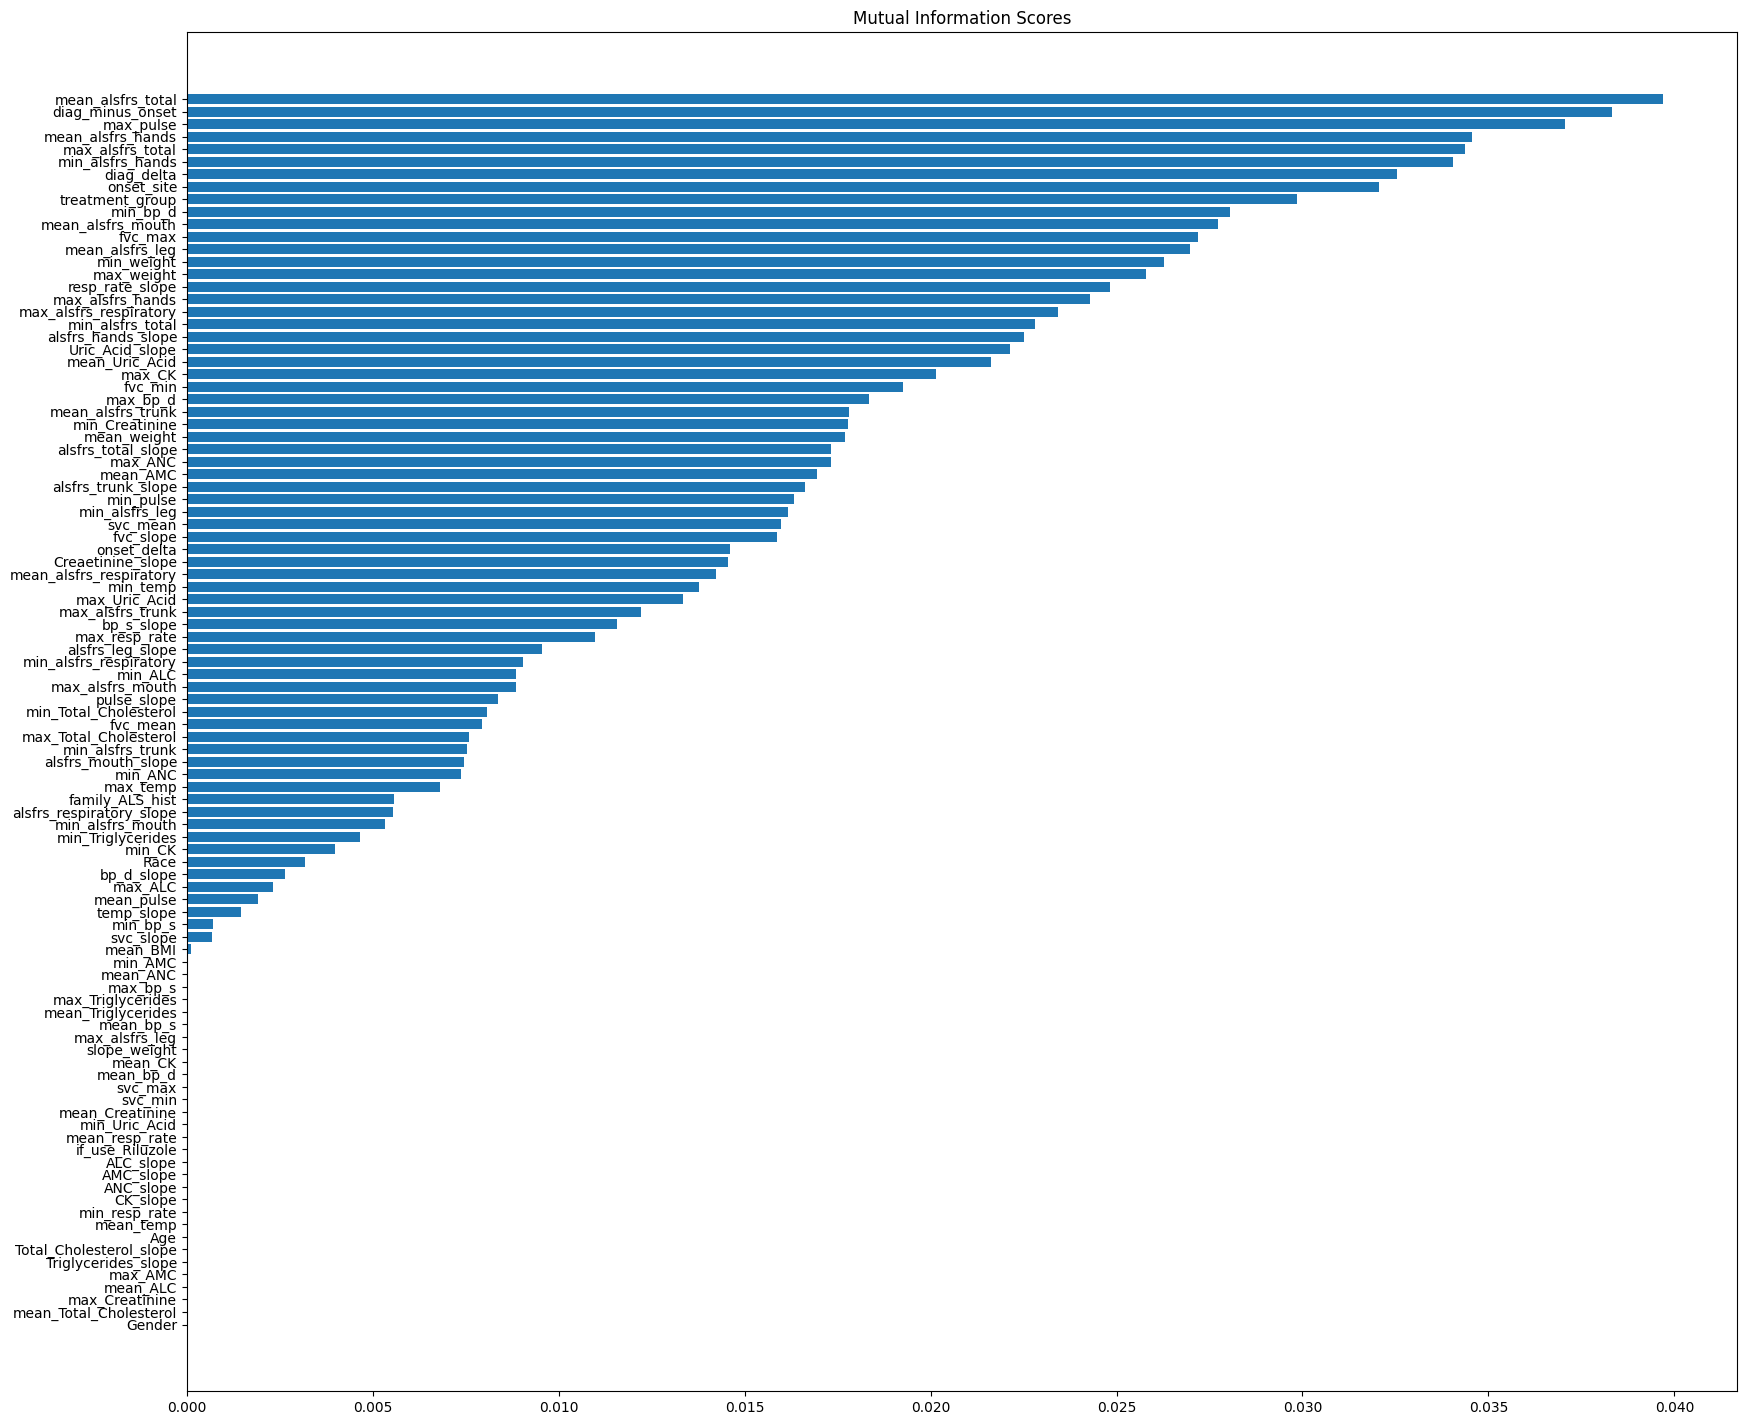

In [11]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(20,18))
plot_mi_scores(mi_scores)

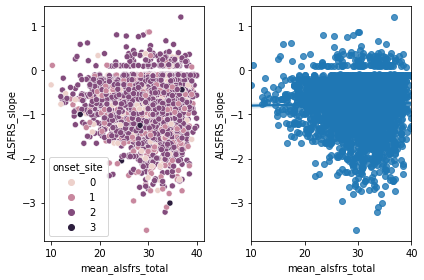

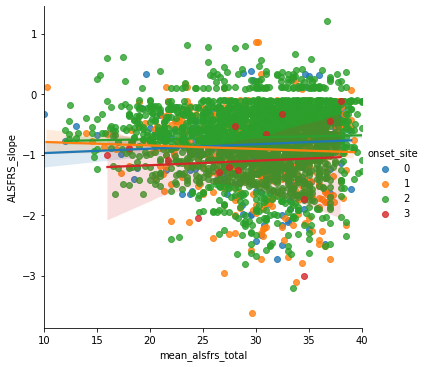

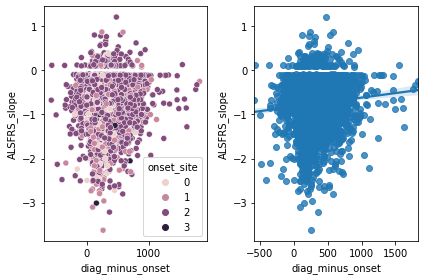

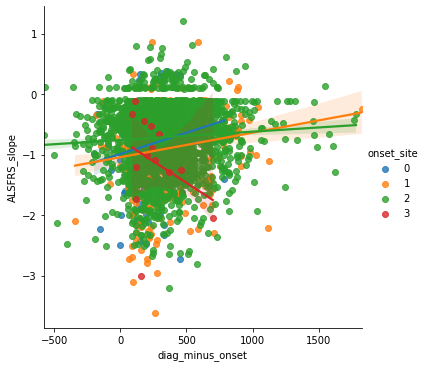

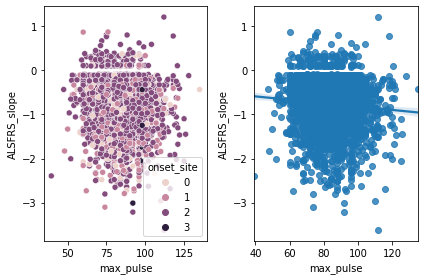

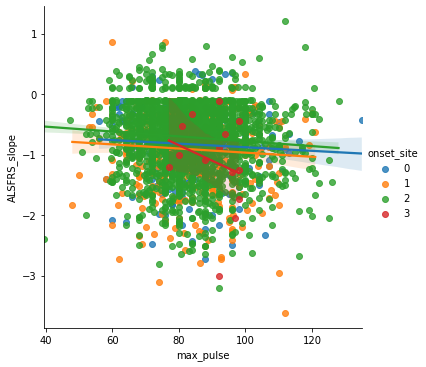

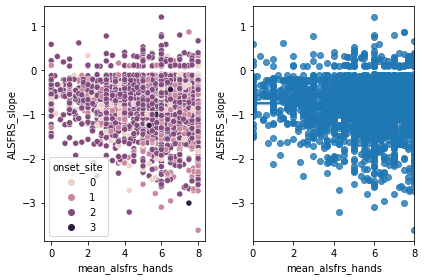

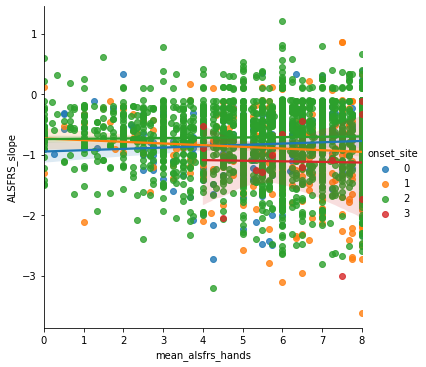

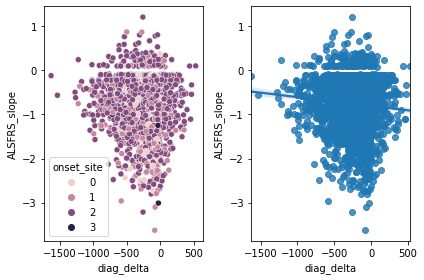

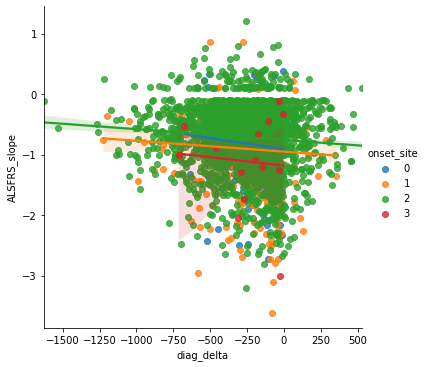

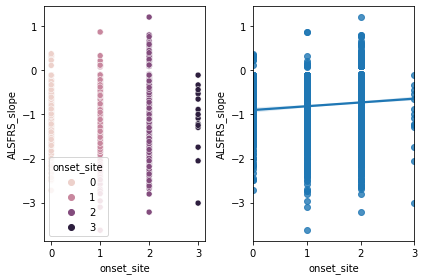

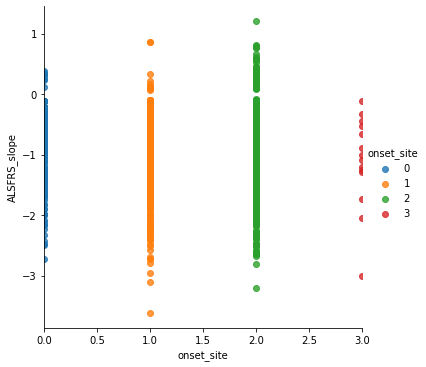

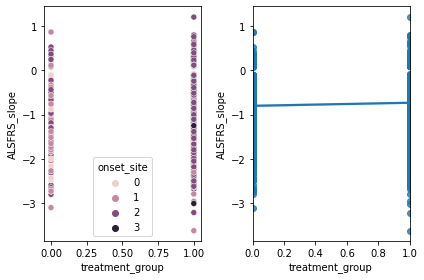

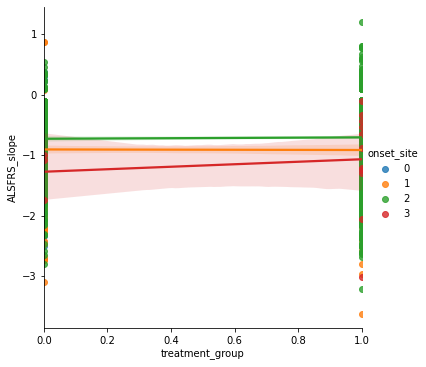

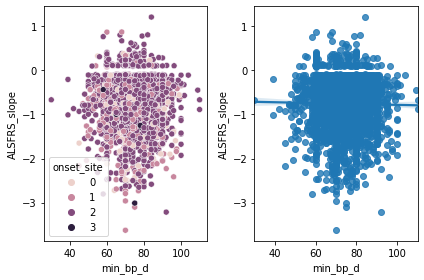

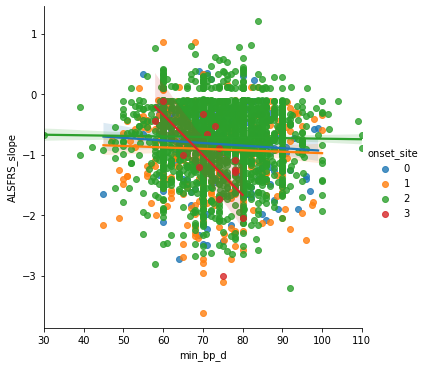

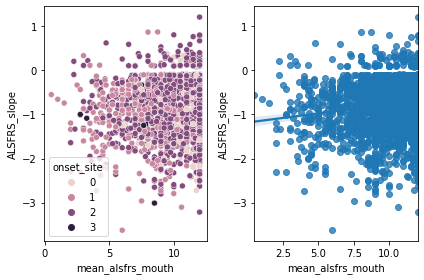

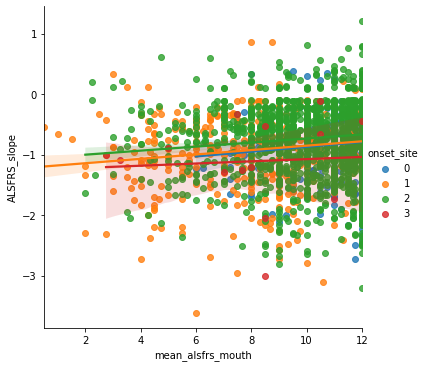

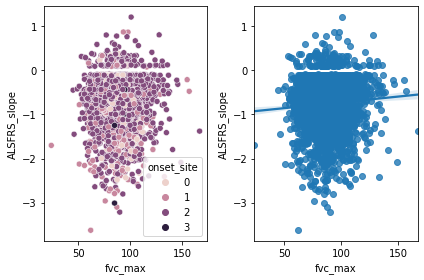

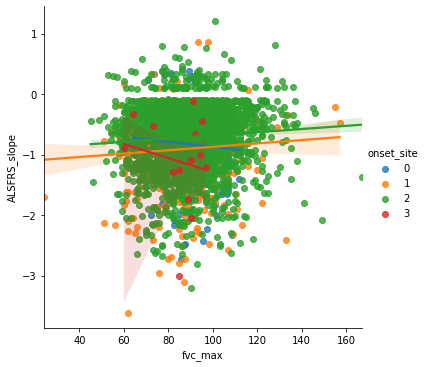

In [16]:
feature_list = ["mean_alsfrs_total", 'diag_minus_onset', 'max_pulse', 'mean_alsfrs_hands', 'diag_delta', 'onset_site', 'treatment_group', 'min_bp_d', 'mean_alsfrs_mouth', 'fvc_max']

for i in feature_list:
    fig, ax = plt.subplots(ncols=2)
    sns.scatterplot(x=i, y="ALSFRS_slope", hue="onset_site", data=data, ax=ax[0])
    sns.regplot(x=i, y="ALSFRS_slope", data=data, ax=ax[1])
    fig.tight_layout()
    sns.lmplot(x=i, y="ALSFRS_slope", hue = "onset_site", data=data)

In [17]:
A = data[feature_list]
B = pd.concat([A, y], axis=1)


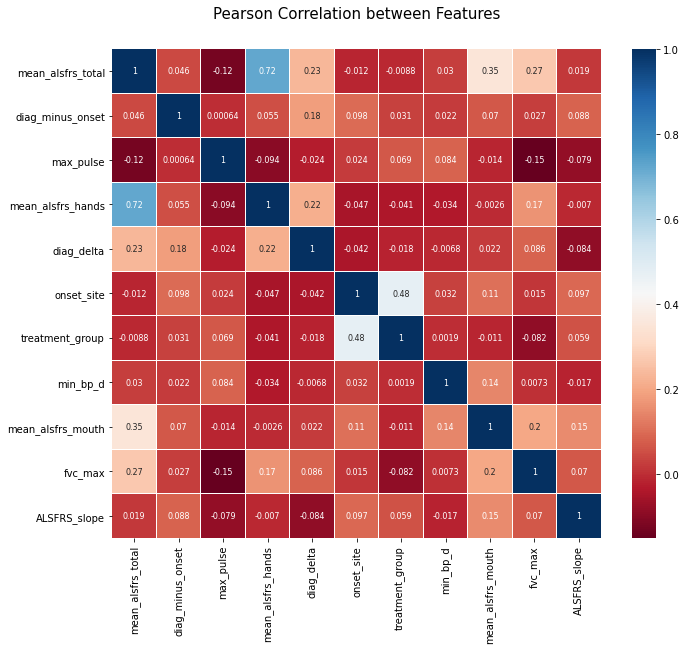

In [18]:
colormap = plt.cm.RdBu
plt.figure(figsize=(11, 9))
plt.title('Pearson Correlation between Features', y=1.05, size=15)
sns.heatmap(B.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":8})

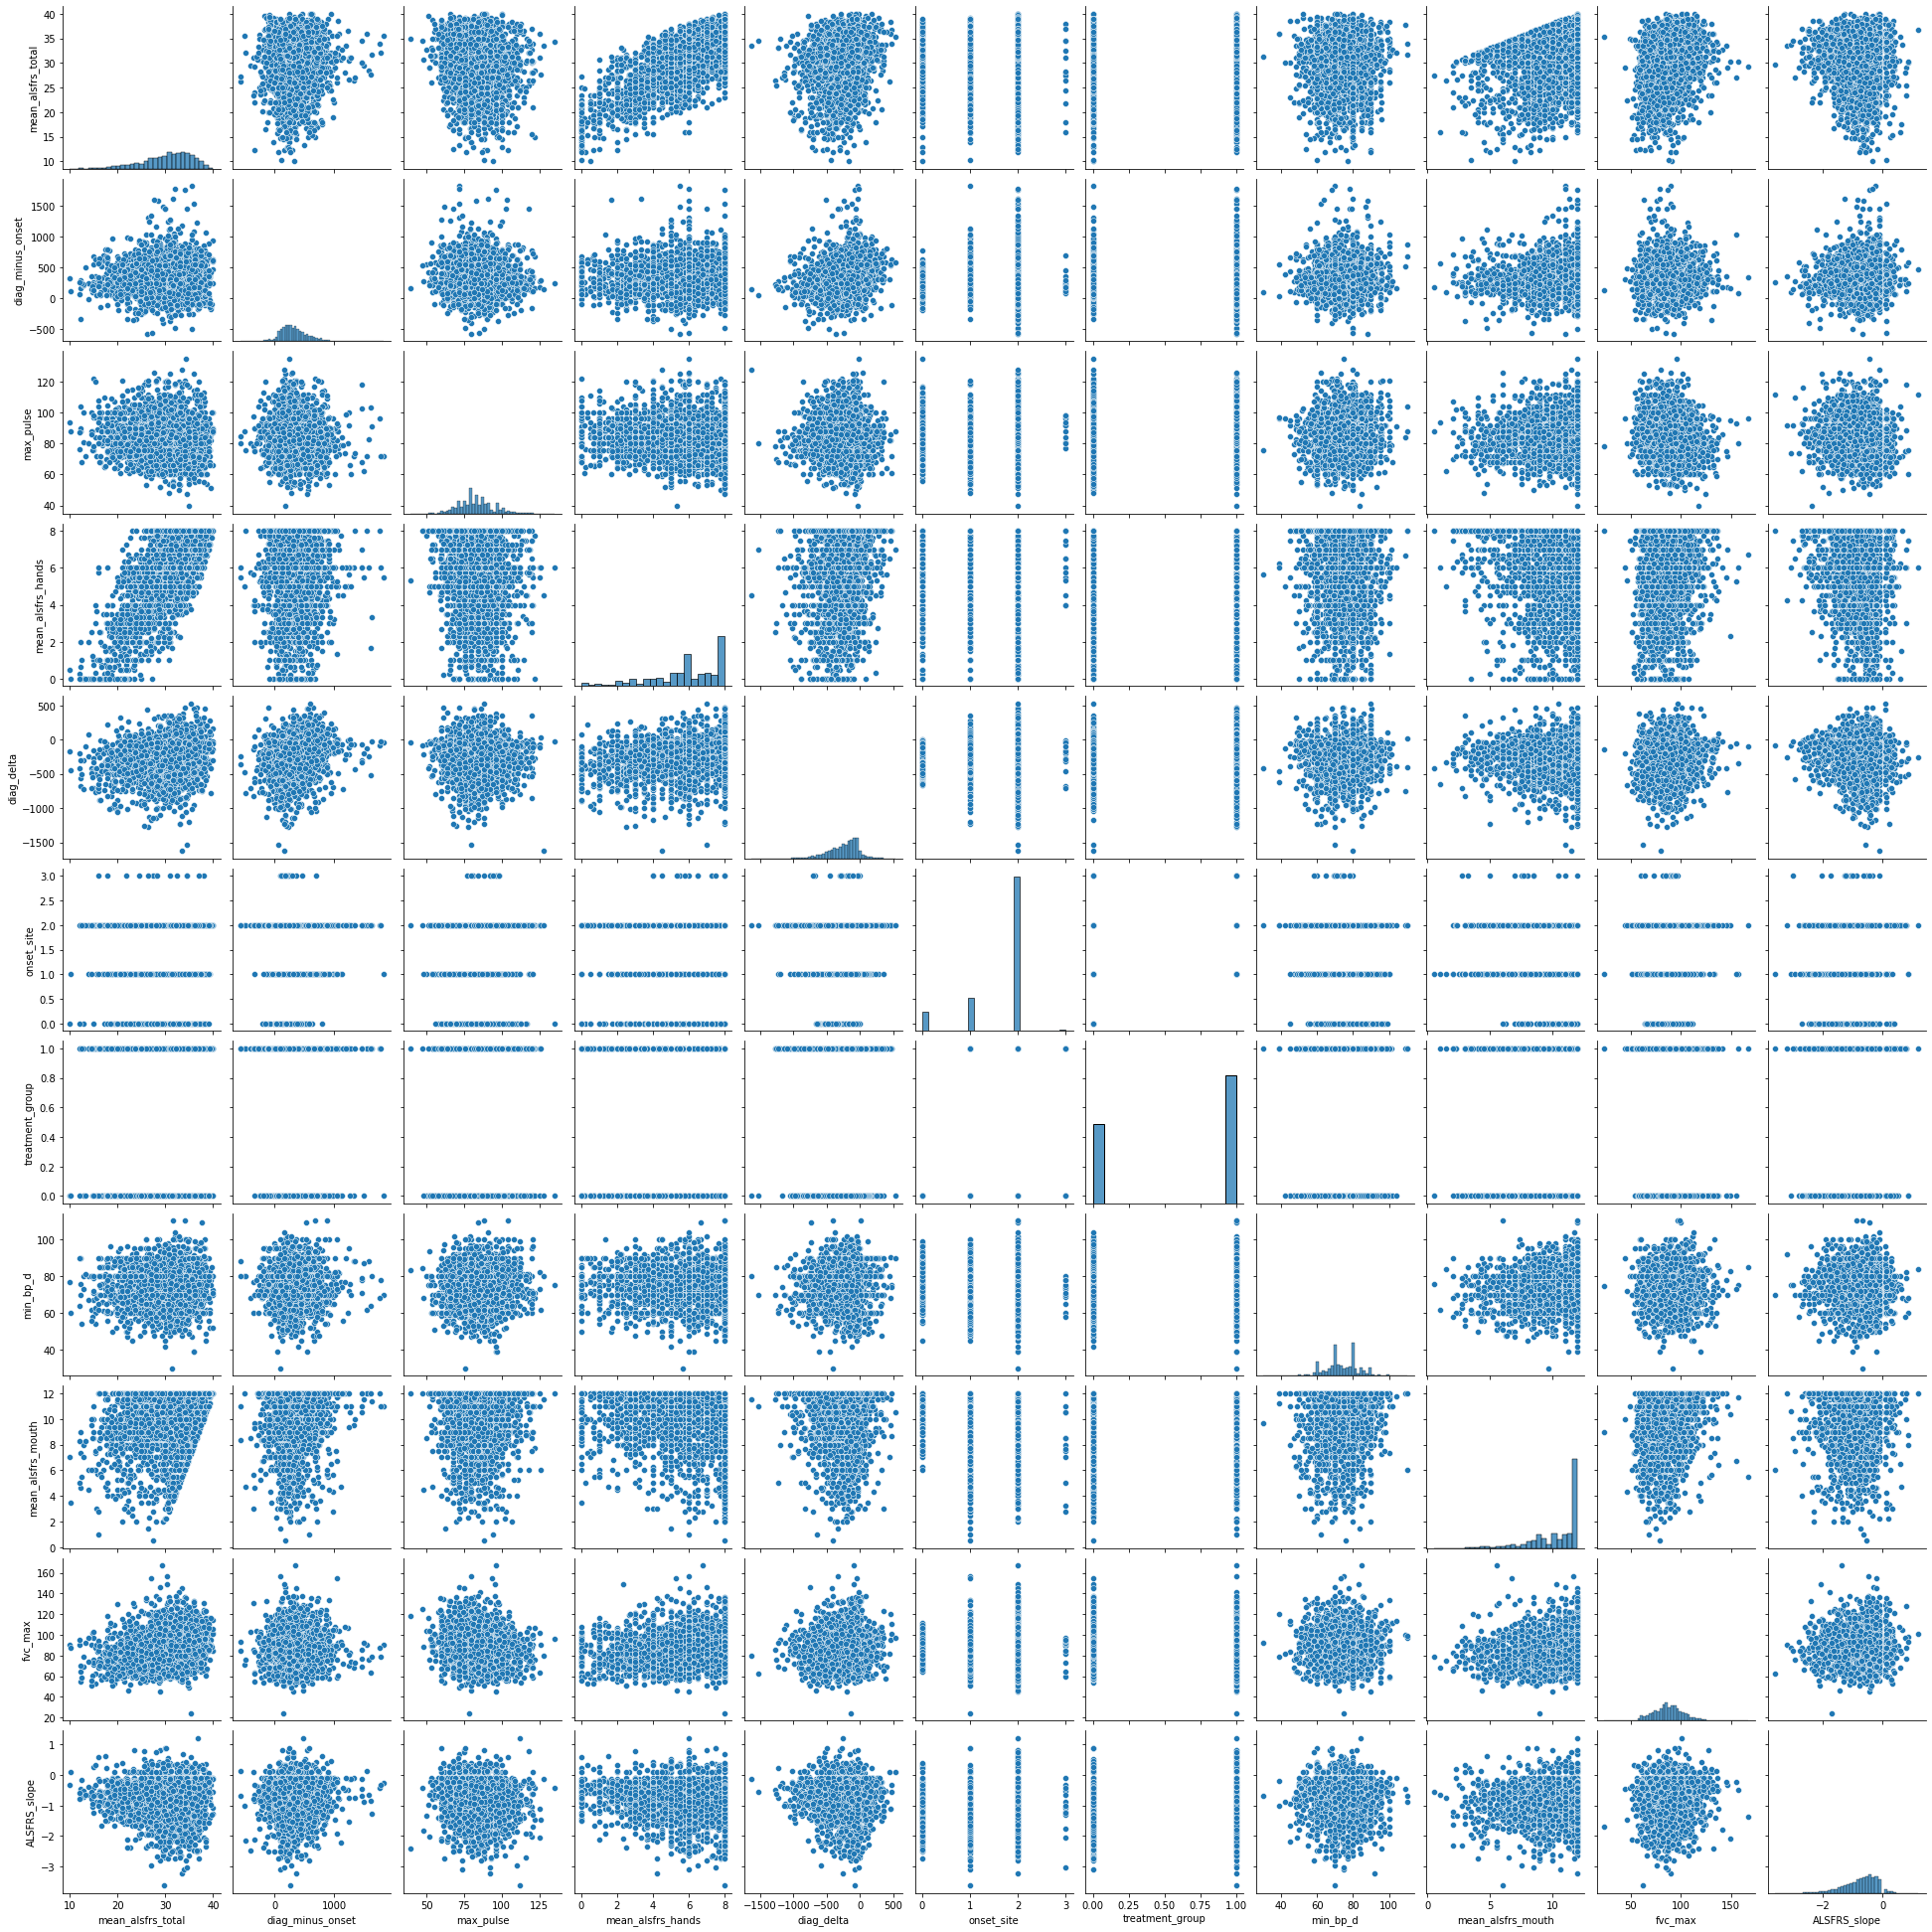

In [19]:
sns.pairplot(B)
plt.show()